In [3]:
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as ss


In [4]:
iris = datasets.load_iris()
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
def majority_votes(votes):
    vote_count = {}
    for vote in votes:
        if vote in vote_count:
            vote_count[vote] += 1
        else:
            vote_count[vote] = 1
    winner = []
    for v,c in vote_count.items():
        if c == max(vote_count.values()):
            winner.append(v)
    return random.choice(winner)

def euclidian_dist(p1,p2):
    return np.sqrt(np.sum(np.power(p2-p1,2)))

def knn_work(points, p, k):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = euclidian_dist(p, points[i])
    ind = np.argsort(distances)
    # return (ind[:k],sorted(distances)[:k])
    return ind[:k]
            
def knn_predict(p, points, outcome, k):
    ind = knn_work(points,p,k)
    # print(ind)
    return majority_votes(outcome[ind])

def generate_syth_data(n = 50):
    '''
    Create two sets of points from bivariate normal distribution.
    '''
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis = 0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points, outcomes)
  
def make_prediction_grid(predictors, outcomes, limits,h, k ):
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min,x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx,yy = np.meshgrid(xs,ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p,predictors, outcomes, k)
    
    return (xx,yy,prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)
    

In [10]:
predictors = iris.data[:,0:2]
outcomes = iris.target

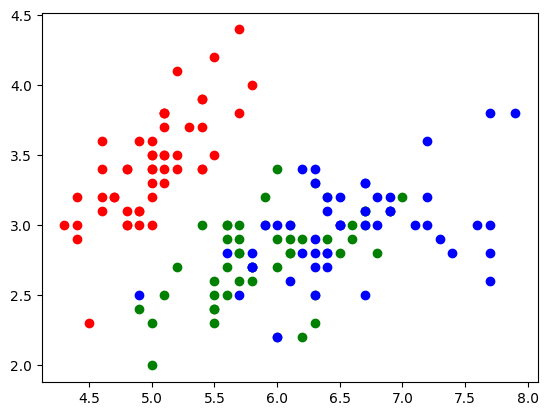

In [8]:
plt.plot(predictors[outcomes == 0] [:,0], predictors[outcomes == 0] [:,1], 'ro')
plt.plot(predictors[outcomes == 1] [:,0], predictors[outcomes == 1] [:,1], 'go')
plt.plot(predictors[outcomes == 2] [:,0], predictors[outcomes == 2] [:,1], 'bo')
plt.savefig('iris.pdf')

plt.show()


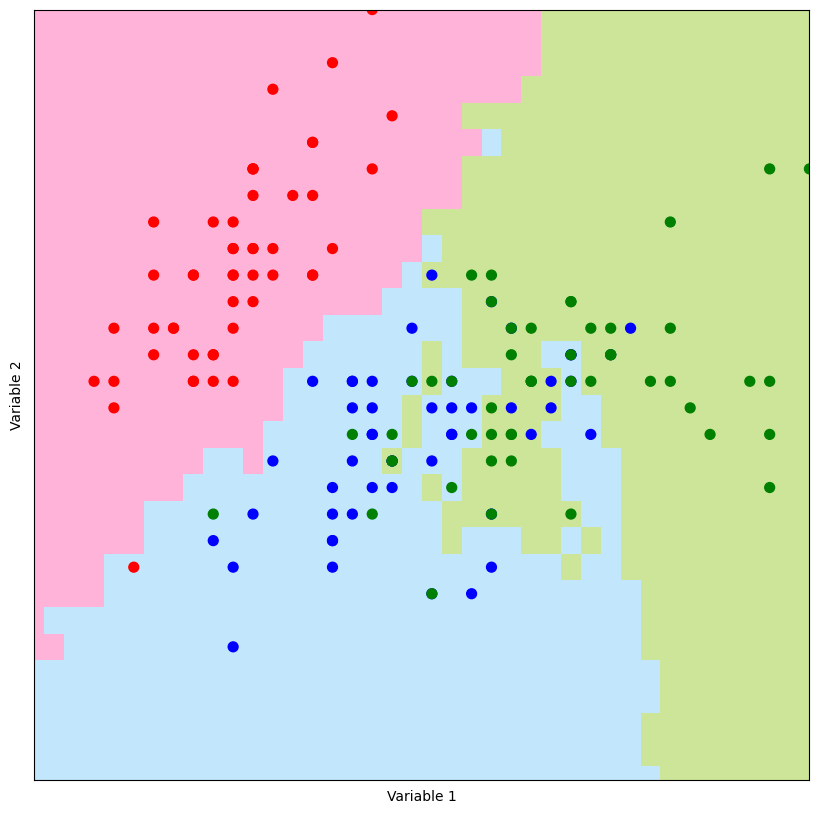

In [11]:
k = 5; 
filename = 'iris_grid.pdf'; 
limits = (4, 8, 1.5 , 4.5); 
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)

In [14]:
sk_predictions.shape

(150,)

In [15]:
sk_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [19]:
100*np.mean(sk_predictions ==  my_predictions)

97.33333333333334

In [21]:
100*np.mean(sk_predictions ==  outcomes)

83.33333333333334

In [22]:
100*np.mean(my_predictions ==  outcomes)

84.66666666666667